In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Split data

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./Age processing/train_AgeFilled.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,Master,Dr,Other
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,0.0,0.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def data_preproessing(data):
    trimmed_data = data.drop(labels=["Name","Ticket","Cabin","PassengerId","Unnamed: 0"],axis=1)
    return trimmed_data

In [5]:
trimmed_data = data_preproessing(data)
train_data,test_data = train_test_split(trimmed_data,test_size=0.3)

In [6]:
train_y = np.array(train_data["Survived"])
test_y = np.array(test_data["Survived"])

In [7]:
train_X = pd.get_dummies(train_data.drop(labels=["Survived"],axis=1))
test_X = pd.get_dummies(test_data.drop(labels=["Survived"],axis=1))

In [8]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
728,2,25.0,1,0,26.0000,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
645,1,48.0,1,0,76.7292,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
804,3,27.0,0,0,6.9750,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
660,1,50.0,2,0,133.6500,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,1
250,3,29.0,0,0,7.2500,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


### Scale data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
### Scale the data
def scale_data(data):
    age_array = np.array(data)[:,np.newaxis]
    age_scaler = StandardScaler().fit(age_array)
    scaled_age = age_scaler.transform(age_array)[:,0]
    return scaled_age

In [11]:
train_X["Age"] = scale_data(train_X["Age"])
train_X["Fare"] = scale_data(train_X["Fare"])

In [12]:
test_X["Age"] = scale_data(test_X["Age"])
test_X["Fare"] = scale_data(test_X["Fare"])

In [13]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
728,2,-0.366109,1,0,-0.136129,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
645,1,1.361814,1,0,0.864311,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
804,3,-0.215855,0,0,-0.511324,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
660,1,1.512068,2,0,1.986857,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,1
250,3,-0.065601,0,0,-0.505901,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


In [14]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
355,3,-0.057152,0,0,-0.447418,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
858,3,-0.337971,0,3,-0.240306,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0
827,2,-1.952684,0,2,0.136337,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,0,0
219,2,0.083258,0,0,-0.426194,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
86,3,-0.899610,1,3,0.080535,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


In [15]:
all_X = np.concatenate((train_X,test_X),axis=0)
all_y = np.concatenate((train_y,test_y),axis=0)
train_X = all_X
train_y = all_y

### Build models

In [16]:
#Since this is a classification task, we use logistic regression, FDA, naive bayes, classification tree, SVM and neural network as our models

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Draw learning curves

In [17]:
from sklearn.model_selection import learning_curve

In [18]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Logistic Regression

In [19]:
LR = LogisticRegression()
LR_grid = {
    "penalty":["l2"],
    "C":[0.01,0.1,0.5,1,2,5,10],
    "fit_intercept":[True,False],
    "solver":["newton-cg","lbfgs","liblinear","sag","saga"],
    "max_iter":[50,100,250,500],
    "n_jobs":[-1]
}
gsLR = GridSearchCV(LR,param_grid=LR_grid,cv=5)
gsLR.fit(train_X,train_y)
LR = gsLR.best_estimator_
gsLR_best = gsLR.best_score_
print("Grid search best score: ",gsLR_best)
# LR.fit(train_X,train_y)

Grid search best score:  0.835016835016835


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

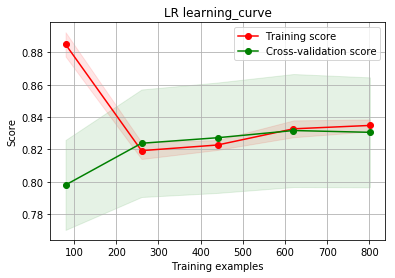

In [20]:
plot_learning_curve(LR,title="LR learning_curve",X=train_X,y=train_y,cv=10)

In [21]:
LR_CV_score_train = cross_val_score(LR,train_X,train_y,cv=10)
LR_CV_score_test = cross_val_score(LR,test_X,test_y,cv=10)

In [22]:
LR_predict_y = LR.predict(test_X)

In [23]:
print("Linear regression cv train mean score: ",LR_CV_score_train.mean())
print("Linear regression cv test mean score: ",LR_CV_score_test.mean())

Linear regression cv train mean score:  0.8294472818068324
Linear regression cv test mean score:  0.8251526251526252


### Linear Discriminant Analysis

In [24]:
LDA = LinearDiscriminantAnalysis()
LDA_grid_svd = {
    "solver": ["svd"],
}
LDA_grid_else = {
    "solver": ["lsqr"],
    "shrinkage": [None,"auto",0,0.25,0.5,0.75,1],
}
gsLDA_svd = GridSearchCV(LDA,param_grid=LDA_grid_svd,n_jobs=-1,cv=5)
gsLDA_svd.fit(train_X,train_y)
gsLDA_else = GridSearchCV(LDA,param_grid=LDA_grid_else,n_jobs=-1,cv=5)
gsLDA_else.fit(train_X,train_y)

if gsLDA_svd.best_score_ > gsLDA_else.best_score_:
    LDA_best = gsLDA_svd.best_score_
    LDA = gsLDA_svd.best_estimator_
else:
    LDA_best = gsLDA_else.best_score_
    LDA = gsLDA_svd.best_estimator_

print("Grid search best score: ",LDA_best)

Grid search best score:  0.8305274971941639


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

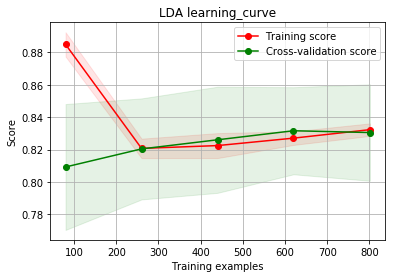

In [25]:
plot_learning_curve(LDA,title="LDA learning_curve",X=train_X,y=train_y,cv=10)

In [26]:
LDA_CV_score_train = cross_val_score(LDA,train_X,train_y,cv=10)
LDA_CV_score_test = cross_val_score(LDA,test_X,test_y,cv=10)

In [27]:
LDA_predict_y = LDA.predict(test_X)

In [28]:
print("Linear discriminant analysis cv train mean score: ",LDA_CV_score_train.mean())
print("Linear discriminant analysis cv test mean score: ",LDA_CV_score_test.mean())

Linear discriminant analysis cv train mean score:  0.8305456247871978
Linear discriminant analysis cv test mean score:  0.8288563288563289


### Naive Bayes

In [29]:
GNB = GaussianNB()
# MNB = MultinomialNB() cannot apply to negative featrue value
BNB = BernoulliNB()

GNB.fit(train_X,train_y)
# MNB.fit(train_X,train_y)
BNB.fit(train_X,train_y)

GNB_CV_score = np.mean(cross_val_score(GNB,train_X,train_y,cv=5))
# MNB_CV_score = cross_val_score(GNB,train_X,train_y,cv=5)
BNB_CV_score = np.mean(cross_val_score(GNB,train_X,train_y,cv=5))

# if GNB_CV_score > MNB_CV_score and GNB_CV_score > BNB_CV_score:
if GNB_CV_score > BNB_CV_score:
    NB = GNB
    NB_best = GNB_CV_score
# elif MNB_CV_score > GNB_CV_score and MNB_CV_score > BNB_CV_score:
#     NB = MNB
#     best = MNB_CV_score
# elif BNB_CV_score > GNB_CV_score and BNB_CV_score > MNB_CV_score:
else:
    NB = BNB
    NB_best = BNB_CV_score

print("Best score: ",NB_best)

Best score:  0.8001981709966037


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

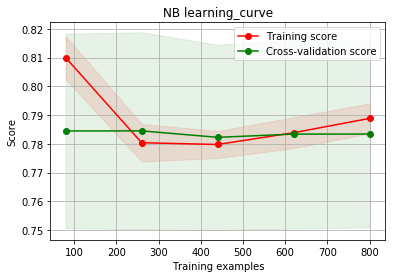

In [30]:
plot_learning_curve(NB,title="NB learning_curve",X=train_X,y=train_y,cv=10)

In [31]:
NB_CV_score_train = cross_val_score(NB,train_X,train_y,cv=10)
NB_CV_score_test = cross_val_score(NB,test_X,test_y,cv=10)

In [32]:
NB_predict_y = NB.predict(test_X)

In [33]:
print("Naive bayes cv train mean score: ",NB_CV_score_train.mean())
print("Naive bayes cv test mean score: ",NB_CV_score_test.mean())

Naive bayes cv train mean score:  0.784526727953694
Naive bayes cv test mean score:  0.7949430199430199


### Decition Tree Classifier

In [34]:
DTC = DecisionTreeClassifier()
DTC_grid = {
    "criterion": ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth": [None,10,25,50,100],
    "min_samples_split": [0.25,0.5,0.75,1.0],
    "min_samples_leaf": [1,2,3]
}

gsDTC = GridSearchCV(DTC,param_grid=DTC_grid,n_jobs=-1,cv=5)
gsDTC.fit(train_X,train_y)
DTC_best = gsDTC.best_score_
DTC = gsDTC.best_estimator_

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

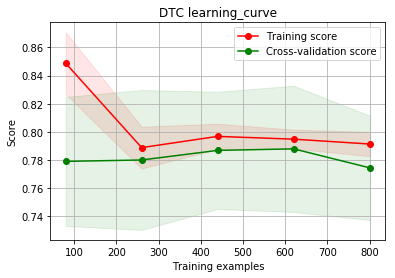

In [35]:
plot_learning_curve(DTC,title="DTC learning_curve",X=train_X,y=train_y,cv=10)

In [36]:
DTC_CV_score_train = cross_val_score(DTC,train_X,train_y,cv=10)
DTC_CV_score_test = cross_val_score(DTC,test_X,test_y,cv=10)

In [37]:
DTC_predict_y = DTC.predict(test_X)

In [38]:
print("Decision tree cv train mean score: ",NB_CV_score_train.mean())
print("Decision tree cv test mean score: ",NB_CV_score_test.mean())

Decision tree cv train mean score:  0.784526727953694
Decision tree cv test mean score:  0.7949430199430199


### Support Vector Classifier

In [39]:
SVM_classfier = SVC()
SVC_grid = {
    "C":[0.5,1,2,5,10],
    "kernel": ["rbf","linear","poly","sigmoid"],
    "degree": [2,3,5,10],
    "shrinking": [True,False],
    "tol": [0.01,0.001],
}
gsSVC = GridSearchCV(SVM_classfier,param_grid=SVC_grid,n_jobs=-1,cv=5)
gsSVC.fit(train_X,train_y)
SVC_best = gsSVC.best_score_
SVM_classfier = gsSVC.best_estimator_

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

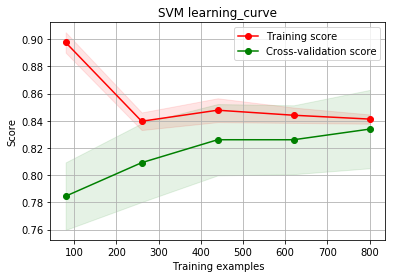

In [40]:
plot_learning_curve(SVM_classfier,title="SVM learning_curve",X=train_X,y=train_y,cv=10)

In [41]:
SVM_CV_score_train = cross_val_score(SVM_classfier,train_X,train_y,cv=10)
SVM_CV_score_test = cross_val_score(SVM_classfier,test_X,test_y,cv=10)

In [42]:
SVM_predict_y = SVM_classfier.predict(test_X)

In [43]:
print("Support vector classifier cv train mean score: ",SVM_CV_score_train.mean())
print("Support vector classifier cv test mean score: ",SVM_CV_score_test.mean())

Support vector classifier cv train mean score:  0.833891442515038
Support vector classifier cv test mean score:  0.813899063899064


### Neural Network

In [44]:
NN = MLPClassifier(hidden_layer_sizes=(64))
NN_grid = {
    "hidden_layer_sizes": [50,100,256,512],
    "activation": ["identity","logistic","tanh","relu"],
    "solver": ["lbfgs","sgd","adam"],
    "alpha": [0.01,0.001,0.0001],
    "learning_rate": ["constant","invscaling","adaptive"],
}
gsNN = GridSearchCV(NN,param_grid=NN_grid,n_jobs=-1,cv=5)
gsNN.fit(train_X,train_y)
NN_best = gsNN.best_score_
NN = gsNN.best_estimator_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

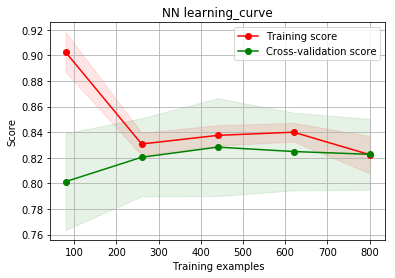

In [45]:
plot_learning_curve(NN,title="NN learning_curve",X=train_X,y=train_y,cv=10)

In [46]:
NN_CV_score_train = cross_val_score(NN,train_X,train_y,cv=10)
NN_CV_score_test = cross_val_score(NN,test_X,test_y,cv=10)

In [47]:
NN_predict_y = NN.predict(test_X)

In [48]:
print("Neural network cv train mean score: ",NN_CV_score_train.mean())
print("Neural network cv test mean score: ",NN_CV_score_test.mean())

Neural network cv train mean score:  0.817099648167064
Neural network cv test mean score:  0.8174603174603174


### Xgboost

In [49]:
XGBC = XGBClassifier()
XGBC_grid = {
    "min_chile_weight": [0.5,1,2,5],
    "max_depth": [2,3,5,10],
    "gamma": [0,0.1,0.2,0.5],
    "max_delta_step": [0,1],
    "reg_lambda": [1,2,5,10,20,50],
    "n_estimators": [50,100,150]
}
gsXGBC = GridSearchCV(XGBC,param_grid=XGBC_grid,n_jobs=-1,cv=5)
gsXGBC.fit(train_X,train_y)
XGBC_best = gsXGBC.best_score_
XGBC = gsXGBC.best_estimator_

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

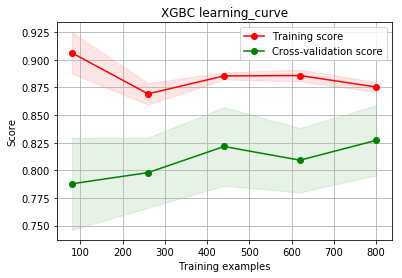

In [50]:
plot_learning_curve(XGBC,title="XGBC learning_curve",X=train_X,y=train_y,cv=10)

In [51]:
XGBC_CV_score_train = cross_val_score(XGBC,train_X,train_y,cv=10)
XGBC_CV_score_test = cross_val_score(XGBC,test_X,test_y,cv=10)

In [52]:
XGBC_predict_y = XGBC.predict(test_X)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15'] ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Other', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
expected f3, f13, f5, f2, f7, f8, f11, f14, f12, f1, f4, f15, f9, f10, f0, f6 in input data
training data did not have the following fields: Parch, Dr, Sex_male, Embarked_S, Sex_female, Age, Embarked_C, Mrs, Pclass, Master, Mr, Other, Fare, Miss, SibSp, Embarked_Q

In [53]:
print("Xgboost cv train mean score: ",XGBC_CV_score_train.mean())
print("Xgboost cv test mean score: ",XGBC_CV_score_test.mean())

Xgboost cv train mean score:  0.8249148791283621
Xgboost cv test mean score:  0.7650386650386649


### Random Forest

In [54]:
RF = RandomForestClassifier()
RF_grid = {
    "n_estimators": [5,10,20,50],
    "criterion": ["gini","entropy"],
    "min_samples_split": [0.25,0.5,0.75,1.0],
    "oob_score": [True,False],
    "n_jobs": [-1],
}
gsRF = GridSearchCV(RF,param_grid=RF_grid,n_jobs=-1,cv=5)
gsRF.fit(train_X,train_y)
RF_best = gsRF.best_score_
RF = gsRF.best_estimator_

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

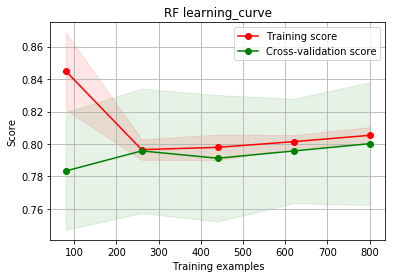

In [55]:
plot_learning_curve(RF,title="RF learning_curve",X=train_X,y=train_y,cv=10)

In [56]:
RF_CV_score_train = cross_val_score(RF,train_X,train_y,cv=10)
RF_CV_score_test = cross_val_score(RF,test_X,test_y,cv=10)

In [57]:
RF_predict_y = RF.predict(test_X)

In [58]:
print("Random forest cv train mean score: ",RF_CV_score_train.mean())
print("Random forest cv test mean score: ",RF_CV_score_test.mean())

Random forest cv train mean score:  0.7991087844739531
Random forest cv test mean score:  0.7875356125356127


### Cross Validation

In [61]:
def draw_comparison(model_names,model_errors,title="Model Error Comparsion",y_range=(0,1)):
    print("Model names: ",model_names)
    print("Model errors: ",model_errors)
    plt.bar(model_names,model_errors)
    plt.ylim(y_range)
    plt.title(title)

In [64]:
model_names = ["LR","LDA","GaussianNB","DTC","SVM","NN","XGBC","RF"]
CV_meanscore_list = [LR_CV_score_test.mean(),LDA_CV_score_test.mean(),NB_CV_score_test.mean(),DTC_CV_score_test.mean(),SVM_CV_score_test.mean(),NN_CV_score_test.mean(),XGBC_CV_score_test.mean(),RF_CV_score_test.mean()]

Model names:  ['LR', 'LDA', 'GaussianNB', 'DTC', 'SVM', 'NN', 'XGBC', 'RF']
Model errors:  [0.8251526251526252, 0.8288563288563289, 0.7949430199430199, 0.7615995115995117, 0.813899063899064, 0.8174603174603174, 0.7650386650386649, 0.7875356125356127]


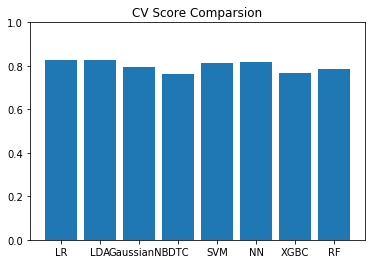

In [66]:
draw_comparison(model_names,CV_meanscore_list,title="CV Score Comparsion")

### Submission

In [67]:
submit_data = pd.read_csv("./Age processing/test_AgeFilled.csv")

In [68]:
submit_data.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,Master,Dr,Other
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,0.0,0.0,0.0,0.0,0.0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,0.0,0.0,0.0,0.0,0.0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
trimmed_submit_data = submit_data.drop(labels=["Name","Ticket","Cabin","PassengerId","Unnamed: 0"],axis=1)

In [70]:
trimmed_submit_data = pd.get_dummies(trimmed_submit_data)

In [71]:
trimmed_submit_data["Age"] = scale_data(trimmed_submit_data["Age"])
trimmed_submit_data["Fare"] = scale_data(trimmed_submit_data["Fare"])

In [72]:
submit_X = trimmed_submit_data
submit_X = pd.get_dummies(submit_X)
submit_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.357049,0,0,-0.497811,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
1,3,1.306695,1,0,-0.512660,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1
2,2,2.446271,0,0,-0.464532,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
3,3,-0.212739,0,0,-0.482888,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,3,-0.592598,1,1,-0.417971,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1


In [73]:
submit_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Mr            418 non-null float64
Mrs           418 non-null float64
Miss          418 non-null float64
Master        418 non-null float64
Dr            418 non-null float64
Other         418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(8), int64(3), uint8(5)
memory usage: 38.0 KB


## Who the fuck didn't pay his fare 😊😊

In [74]:
submit_X = submit_X.fillna(32.204208)

In [75]:
submit_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Mr            418 non-null float64
Mrs           418 non-null float64
Miss          418 non-null float64
Master        418 non-null float64
Dr            418 non-null float64
Other         418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(8), int64(3), uint8(5)
memory usage: 38.0 KB


In [76]:
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# model_weights = normalizer.fit_transform(np.array(CV_meanscore_list)[np.newaxis,:])
# model_weights = model_weights[0]

# def combine_predict(submit_X,weights):
#     LR_pred = LR.predict(submit_X)*weights[0]
#     LDA_pred = LDA.predict(submit_X)*weights[1]
#     GNB_pred = NB.predict(submit_X)*weights[2]
#     DTC_pred = DTC.predict(submit_X)*weights[3]
#     SVM_pred = SVM_classfier.predict(submit_X)*weights[4]
#     NN_pred = NN.predict(submit_X)*weights[5]
#     result = LR_pred+LDA_pred+GNB_pred+DTC_pred+SVM_pred+NN_pred
#     return result

# raw_result = combine_predict(submit_X,model_weights)

In [77]:
# result = []

# for i in list(raw_result):
#     if i > 0.6:
#         result.append(1)
#     else:
#         result.append(0)


In [78]:
# all_X = np.concatenate((train_X,test_X),axis=0)
# all_y = np.concatenate((train_y,test_y),axis=0)
# SVM_classfier.fit(all_X,all_y)

In [79]:
result = LR.predict(submit_X)

In [ ]:
submit_result = np.array(result)

In [ ]:
survive = pd.DataFrame(np.array(submit_result,dtype="int"),columns=["Survived"])

In [ ]:
submit = pd.concat([submit_data["PassengerId"],survive],axis=1)

In [ ]:
submit.head()

In [ ]:
submit.to_csv("Submission.csv",index=False)